In [3]:
from middleware import signalHandler, llmHandler, emotionalStateMachine, nlp

In [2]:
from middleware.emotionalStateMachine import emotional_state

In [1]:
from middleware.llmHandler import check_rude_message
from middleware.nlp import check_nice_message

In [16]:
from middleware.sampleMessages import all_samples

In [12]:
from middleware.llmHandler import handle_model_interaction

In [13]:
def message_loop(message, sm):
    rude_message = check_rude_message(message)
    nice_message = check_nice_message(message)
    if nice_message==True:
        if sm.current_state.id == 'contented':
            sm.get_complement()
        if sm.current_state.id == 'angry':
            sm.get_apology()
        if sm.current_state.id == 'sad':
            sm.get_peptalk()

    if rude_message==True: 
        if sm.current_state.id == 'contented':
            sm.get_offended()
        ## This is double calling angry
        if sm.current_state.id == 'angry':
            sm.get_heckled()
        if sm.current_state.id == 'sad':
            sm.get_bullied()    
    
    print(handle_model_interaction(message, mood=sm.current_state.id))

Entering 'contented' state from '__initial__' event.
State: contented
Mood: 0, Gassed up
Bored: 0/4


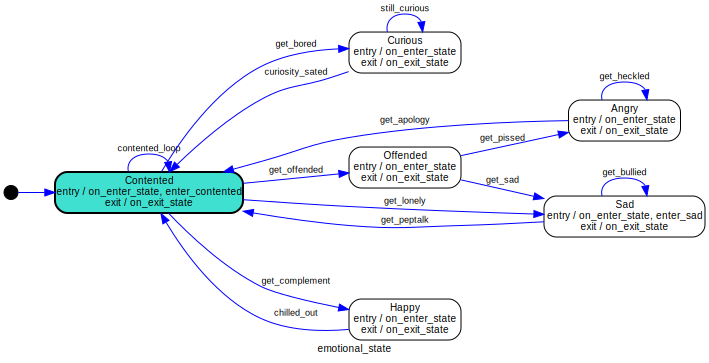

In [14]:
vulcan = emotional_state()

vulcan

In [15]:
message_loop("Wake up dawg", sm=vulcan)

Groggily opening one eye... what be happenin'?


In [ ]:
for i in all_samples:
    message_loop(i, sm=vulcan)

Exiting 'contented' state from 'get_complement' event.
>> That made me feel really good!
Entering 'happy' state from 'get_complement' event.
Exiting 'happy' state from 'chilled_out' event.
>> Back to baseline...
Entering 'contented' state from 'chilled_out' event.
State: contented
Mood: 1, Gassed up
Bored: 0/4
